<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/intro_nlp_1_e_2/intro_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com os dados do IMDB

* [IMDB PT-BR: Tradução do dataset IMdb para o português](https://www.kaggle.com/luisfredgs/imdb-ptbr)


In [0]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer



In [0]:

nltk.download('all')
%matplotlib inline

In [2]:
path = './imdb-reviews-pt-br.csv'
resenha = pd.read_csv(path)
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
# Proporção de classes
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [4]:
# Binarizar as classes
mudar = {'neg': 0, 'pos': 1}
resenha.sentiment = resenha.sentiment.map(mudar)
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


* Criar vocabulário usando *bag of words* (sacola de palavras), um método de extração de features que cria vetores com classificação e pertence ou não a palavra;

* *Bag of words* cria uma *label* para cada palavra do nossos dados, ocupando grande parte da memória. Dentro dessa representação há linhas e colunas com valores nulos (**matriz esparsa**). Para evitar *overflow* de memória se usa `SparseDataFrame`.

```
df = pd.SparseDataFrame(matriz_esparsa)
```


In [5]:
# Exemplo de bag of words
text = ['Assisti um filme ótimo', 'Assisti um filme ruim']
vetorizar = CountVectorizer(lowercase=False)
bow = vetorizar.fit_transform(text)
bow

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [6]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bow, columns=vetorizar.get_feature_names())
#  pandas.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names()))
matriz_esparsa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/sparse/frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pyd

,Assisti,filme,ruim,um,ótimo
0,1,1,NaN,1,1.0
1,1,1,1.0,1,NaN


In [7]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bow = vetorizar.fit_transform(resenha.text_pt)
bow.shape

(49459, 50)

In [0]:
# matriz_esparsa = pd.SparseDataFrame(bow, columns=vetorizar.get_feature_names())
# matriz_esparsa = matriz_esparsa.fillna(0)
# matriz_esparsa.head()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(bow, resenha.sentiment, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37094, 50), (12365, 50), (37094,), (12365,))

In [10]:
lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
acc = lr.score(X_test, y_test)
acc

0.6583097452486858

In [13]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bow = vetorizar.fit_transform(texto[coluna_texto])
    X_train, X_test, y_train, y_test = train_test_split(bow, texto[coluna_classificacao], random_state=42)
    lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
    acc = lr.score(X_test, y_test)
    return acc

classificar_texto(resenha, 'text_pt', 'sentiment')


0.6583097452486858

In [0]:
todas_palavras = ' '.join([texto for texto in resenha['text_pt']])
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(todas_palavras)


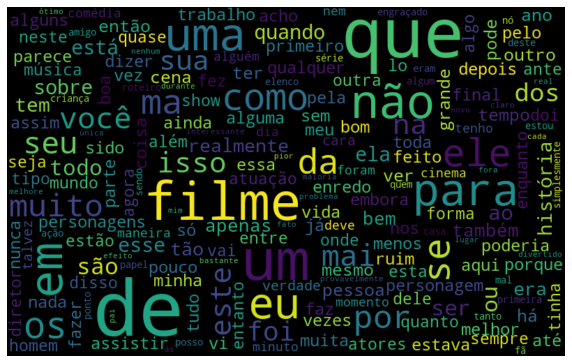

In [19]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

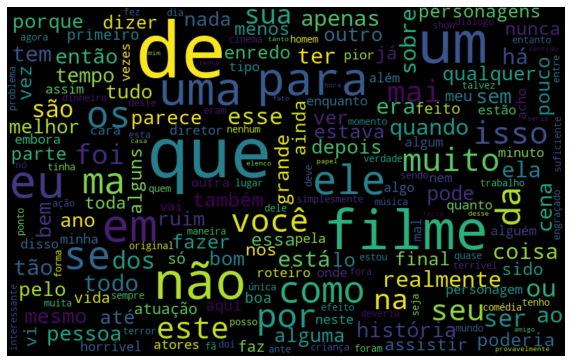

In [21]:

def nuvem_palavras(texto_filtrado, coluna_texto):
  todas_palavras = ' '.join([texto for texto in texto_filtrado[coluna_texto]])
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                            collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

texto_negativo = resenha.query('sentiment == 0')
nuvem_palavras(texto_negativo, "text_pt")

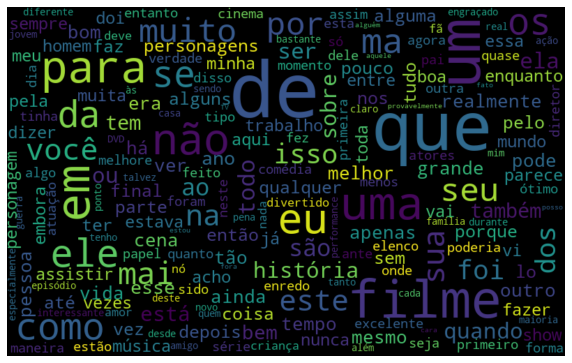

In [22]:

texto_positivo = resenha.query('sentiment == 1')
nuvem_palavras(texto_positivo, "text_pt")

In [26]:
# Exemplo com NLTK
frase = ['um filme ruim', 'um filme bom']
freq = nltk.FreqDist(frase)
freq

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [28]:
# Tokenização
frase = 'Bem vindo ao mundo do PLN!'
token_espaco = nltk.tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase


['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

In [30]:
# Tokenizando os dados
token_espaco = nltk.tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
freq = nltk.FreqDist(token_frase)
freq

FreqDist({'Mais': 1538,
          'uma': 130888,
          'vez,': 1927,
          'o': 244881,
          'Sr.': 1741,
          'Costner': 50,
          'arrumou': 3,
          'um': 216410,
          'filme': 117543,
          'por': 61339,
          'muito': 51761,
          'mais': 53504,
          'tempo': 10424,
          'do': 101737,
          'que': 325070,
          'necessário.': 135,
          'Além': 3631,
          'das': 16496,
          'terríveis': 576,
          'seqüências': 586,
          'de': 417651,
          'resgate': 152,
          'no': 57145,
          'mar,': 63,
          'quais': 1537,
          'há': 15824,
          'poucas,': 7,
          'eu': 68814,
          'simplesmente': 6436,
          'não': 127915,
          'me': 19136,
          'importei': 109,
          'com': 99174,
          'nenhum': 4531,
          'dos': 41222,
          'personagens.': 1027,
          'A': 31547,
          'maioria': 5565,
          'nós': 3944,
          'tem': 2498

In [34]:
df_freq = pd.DataFrame({'Palavra': list(freq.keys()), 
                        'Frequencia': list(freq.values())}).sort_values(by=['Frequencia'], ascending=False)
df_freq.head(10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


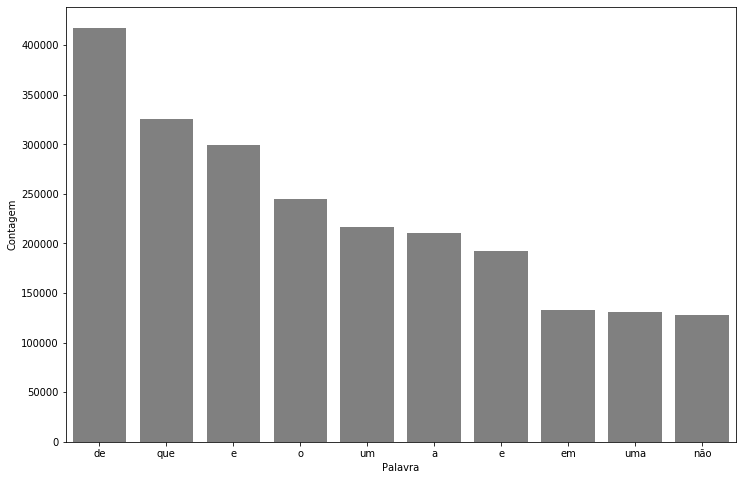

In [38]:
# Grafico de pareto

plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_freq.head(10), x='Palavra', y='Frequencia', color='gray')
ax.set(ylabel='Contagem')
plt.show()

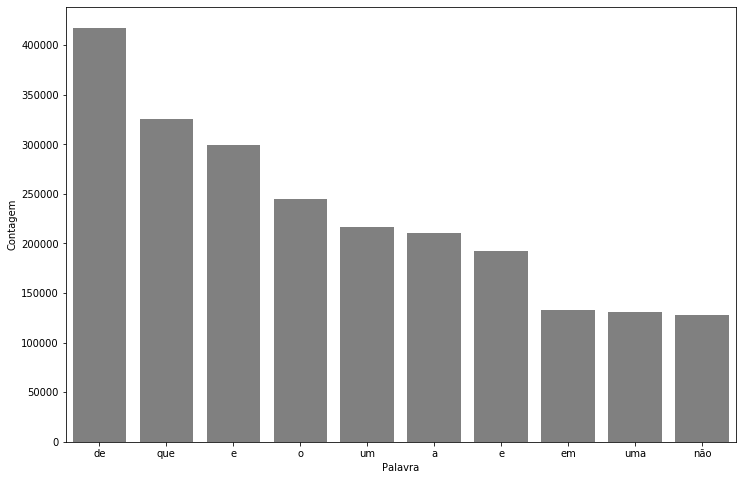

In [39]:
def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_espaco = nltk.tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(todas_palavras)
  freq = nltk.FreqDist(token_frase)
  df_freq = pd.DataFrame({
      'Palavra': list(freq.keys()),
      'Frequencia': list(freq.values())}).sort_values(
          by=['Frequencia'], ascending=False)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_freq.head(quantidade), x='Palavra', y='Frequencia', color='gray')
  ax.set(ylabel='Contagem')
  plt.show()

pareto(resenha, 'text_pt', 10)

In [47]:
# Removendo stopwords em pt-br
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

def remove_words(df, lst_palavras=palavras_irrelevantes):
  token_espaco = nltk.tokenize.WhitespaceTokenizer()
  palavras_texto = token_espaco.tokenize(df.text_pt)
  tratamento_1 = ' '.join([palavra for palavra in palavras_texto if palavra not in lst_palavras])
  return tratamento_1

resenha['tratamento_1'] = resenha.apply(lambda x: remove_words(x, palavras_irrelevantes), axis=1)
resenha.head()

,id,text_en,text_pt,sentiment,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [44]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


In [48]:
classificar_texto(resenha, 'tratamento_1', 'sentiment')

0.6607359482410028

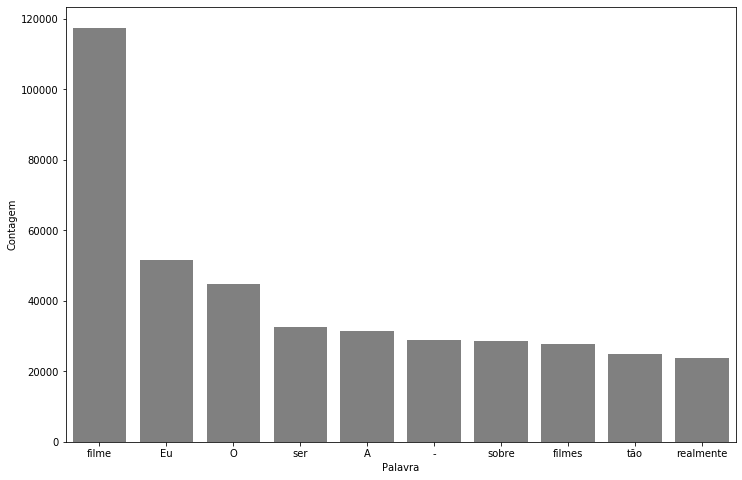

In [49]:
pareto(resenha, 'tratamento_1', 10)